In [103]:
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.utils.data as Data
import numpy as np

In [4]:
# Load the EMNIST dataset

train_data = torchvision.datasets.EMNIST(
    root='.data',
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=False,
    split='letters'
)

test_data = torchvision.datasets.EMNIST(
    root='.data',
    train=False,
    transform=torchvision.transforms.ToTensor(),
    download=False,
    split='letters'     
)

Image Label: u


tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0157,
         0.0157, 0.0353, 0.1255, 0.1255, 0.0118, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0392, 0.4431,
         0.4980, 0.5490, 0.7961, 0.7961, 0.3059, 0.0275

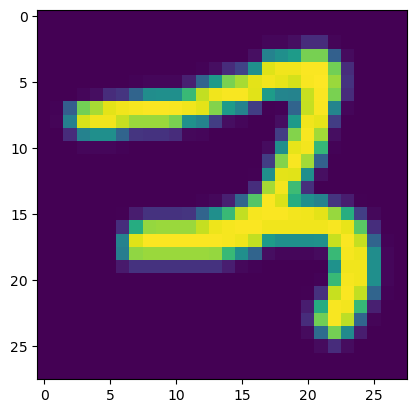

In [5]:
x_train = train_data.data[:20] / 255
y_train = train_data.targets[:20]

# Show some random image of a character and its label

img_index = 16
img = x_train[img_index]
print("Image Label: " + str(chr(y_train[img_index]+96)))
plt.imshow(img.reshape((28,28)))

img

In [95]:
a = torch.tensor([[x + 1 for x in range(28 * y, 28 * (y + 1))] for y in range(28)])
c = a.split(4, dim=0)
torch.stack([torch.stack(d.split(4, dim=1)).view(7, 16) for d in c])
# c.split(4, dim=2)
# d = c[0]
# d = d.split(4, dim=1)
# d = torch.stack(d)
# d.view(7, 16)

tensor([[[  1,   2,   3,   4,  29,  30,  31,  32,  57,  58,  59,  60,  85,  86,
           87,  88],
         [  5,   6,   7,   8,  33,  34,  35,  36,  61,  62,  63,  64,  89,  90,
           91,  92],
         [  9,  10,  11,  12,  37,  38,  39,  40,  65,  66,  67,  68,  93,  94,
           95,  96],
         [ 13,  14,  15,  16,  41,  42,  43,  44,  69,  70,  71,  72,  97,  98,
           99, 100],
         [ 17,  18,  19,  20,  45,  46,  47,  48,  73,  74,  75,  76, 101, 102,
          103, 104],
         [ 21,  22,  23,  24,  49,  50,  51,  52,  77,  78,  79,  80, 105, 106,
          107, 108],
         [ 25,  26,  27,  28,  53,  54,  55,  56,  81,  82,  83,  84, 109, 110,
          111, 112]],

        [[113, 114, 115, 116, 141, 142, 143, 144, 169, 170, 171, 172, 197, 198,
          199, 200],
         [117, 118, 119, 120, 145, 146, 147, 148, 173, 174, 175, 176, 201, 202,
          203, 204],
         [121, 122, 123, 124, 149, 150, 151, 152, 177, 178, 179, 180, 205, 206,
         

In [107]:
# choose a particular image and convert to the right type
temp_image = torch.stack([torch.stack(d.split(4, dim=1)).view(7, 16) for d in img.split(4, dim=0)])

In [120]:
# Parameters of the first layer, scanning from four directions

hidden_units1 = 2
input_feature1 = 16

# Input gate
weight_input_gate1_tl = torch.randn((input_feature1, hidden_units1), requires_grad=True)
weight_input_state1_tl = torch.randn((hidden_units1, hidden_units1), requires_grad=True)
weight_input_cellout1_tl = torch.randn((2, hidden_units1, hidden_units1), requires_grad=True)
bias_input_gate1_tl = torch.randn(hidden_units1, requires_grad=True)

# Forget gate
weight_forget_gate1_tl = torch.randn((2, input_feature1, hidden_units1), requires_grad=True)
weight_forget_cellout1_tl = torch.randn((2, hidden_units1, hidden_units1), requires_grad=True)
weight_forget_state1_tl = torch.randn((2, hidden_units1, hidden_units1), requires_grad=True)
bias_forget_gate1_tl = torch.randn(hidden_units1, requires_grad=True)

# Cell
weight_cell1_tl = torch.randn((input_feature1, hidden_units1), requires_grad=True)
weight_cell_cellout1_tl = torch.randn((2, hidden_units1, hidden_units1), requires_grad=True)
bias_cell1_tl = torch.randn(hidden_units1, requires_grad=True)

# Output gate
weight_output_gate1_tl = torch.randn((input_feature1, hidden_units1), requires_grad=True)
weight_output_cellout1_tl = torch.randn((2, hidden_units1, hidden_units1), requires_grad=True)
weight_output_state1_tl = torch.randn((hidden_units1, hidden_units1), requires_grad=True)
bias_output_gate1_tl = torch.randn(hidden_units1, requires_grad=True)


In [123]:
# The network of the first layer, containing four directions

# Starting from top left

def forward1_tl(image):
    # Suppose image is a tensor of 7*7*16, all 49 blocks
    states = np.zeros((7, 7)).tolist()
    cell_outputs = np.zeros((7, 7)).tolist()

    # Top left
    for row in range(7):
        for col in range(7):
            _input = image[row][col]
            # Deal with input gate
            input_gate = _input @ weight_input_gate1_tl + bias_input_gate1_tl
            if row > 0:
                temp1 = states[row - 1][col] @ weight_input_state1_tl
                temp2 = cell_outputs[row - 1][col] @ weight_input_cellout1_tl[0]
                input_gate += temp1 + temp2
            if col > 0:
                temp1 = states[row][col - 1] @ weight_input_state1_tl
                temp2 = cell_outputs[row][col - 1] @ weight_input_cellout1_tl[0]
                input_gate += temp1 + temp2
            input_gate = input_gate.sigmoid()

            # Deal with forget gate
            forget_gates = []
            for d in range(2):
                forget_gate = _input @ weight_forget_gate1_tl[d] + bias_forget_gate1_tl
                if row > 0:
                    forget_gate += cell_outputs[row - 1][col] @ weight_forget_cellout1_tl[0]
                if col > 0:
                    forget_gate += cell_outputs[row][col - 1] @ weight_forget_cellout1_tl[1]
                if d == 0 and row > 0:
                    forget_gate += states[row - 1][col] @ weight_forget_state1_tl[0]
                if d == 1 and col > 0:
                    forget_gate += states[row][col - 1] @ weight_forget_state1_tl[1]
                forget_gates.append(forget_gate.sigmoid())
            
            # Deal with cell
            cell = _input @ weight_cell1_tl + bias_cell1_tl
            if row > 0:
                cell += cell_outputs[row - 1][col] @ weight_cell_cellout1_tl[0]
            if col > 0:
                cell += cell_outputs[row][col - 1] @ weight_cell_cellout1_tl[1]
            
            # Deal with state
            state = input_gate * cell.tanh()
            if row > 0:
                state += states[row - 1][col] * forget_gates[0]
            if col > 0:
                state += states[row][col - 1] * forget_gates[1]
            states[row][col] = state

            # Deal with output gate
            output = _input @ weight_output_gate1_tl + bias_output_gate1_tl + state @ weight_output_state1_tl
            if row > 0:
                output += cell_outputs[row - 1][col] @ weight_output_cellout1_tl[0]
            if col > 0:
                output += cell_outputs[row][col - 1] @ weight_output_cellout1_tl[1]
            output = output.sigmoid()

            # Deal with cell output
            cell_output = output * state.tanh()
            cell_outputs[row][col] = cell_output
    
    return cell_outputs
            

In [124]:
forward1_tl(temp_image)

[[tensor([ 0.0351, -0.1234], grad_fn=<MulBackward0>),
  tensor([ 0.0257, -0.1725], grad_fn=<MulBackward0>),
  tensor([ 0.0104, -0.1715], grad_fn=<MulBackward0>),
  tensor([ 0.0033, -0.1485], grad_fn=<MulBackward0>),
  tensor([ 0.0104, -0.0592], grad_fn=<MulBackward0>),
  tensor([ 0.0459, -0.2389], grad_fn=<MulBackward0>),
  tensor([ 0.0081, -0.1095], grad_fn=<MulBackward0>)],
 [tensor([0.0298, 0.0128], grad_fn=<MulBackward0>),
  tensor([0.0778, 0.2276], grad_fn=<MulBackward0>),
  tensor([0.1352, 0.6430], grad_fn=<MulBackward0>),
  tensor([0.4754, 0.6785], grad_fn=<MulBackward0>),
  tensor([ 0.9181, -0.1515], grad_fn=<MulBackward0>),
  tensor([ 0.9972, -0.3258], grad_fn=<MulBackward0>),
  tensor([ 0.9927, -0.3289], grad_fn=<MulBackward0>)],
 [tensor([ 0.3899, -0.0749], grad_fn=<MulBackward0>),
  tensor([ 0.7000, -0.5099], grad_fn=<MulBackward0>),
  tensor([ 0.6728, -0.5000], grad_fn=<MulBackward0>),
  tensor([ 0.4878, -0.5664], grad_fn=<MulBackward0>),
  tensor([0.5257, 0.0881], grad_fn